In [1]:
%matplotlib inline

In [6]:
import pandas as pd

In [126]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import re
import sklearn as sk
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import preprocessing as pr
from sklearn import metrics as mr
from sklearn.model_selection import train_test_split

In [160]:
from sklearn.linear_model import LinearRegression

In [150]:
from sklearn.linear_model import Ridge

In [151]:
from sklearn.linear_model import Lasso

In [159]:
from sklearn.kernel_ridge import KernelRidge

## Просмотр, преобразование и чистка данных

In [9]:
df = pd.read_csv('carseats.csv', sep = ",", decimal = ".")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Описание данных

**Sales** - продажи автомобильных кресел (в тысячах шт.) в населенном пункте
<br>
**CompPrice** - цена, взимаемая конкурентом в населеном пункте
<br>
**Income** - уровень дохода (в тысячах долларов)
<br>
**Advertising** - местный рекламный бюджет для компании в населенном пункте (в тысячах долларов)
<br>
**Population** - численность населения в регионе (в тысячах человек)
<br>
**Price** - цена, которую компания взимает за автомобильное кресло в регионе
<br>
**ShelveLoc** - качество расположения стеллажей для автокресел в населенном пункте.
Имеет значения ***"Bad", "Good", "Medium"***
<br>
**Age** - средний возраст среди местного населения
<br>
**Education** - уровень образования в населенном пункте
<br>
**Urban** - фактор со значениями ***"No" и "Yes"***, указывающий, находится ли магазин в городе или сельской местности
<br>
**US** - фактор со значениями ***"No" и "Yes"***, чтобы указать, находится ли магазин в США или нет

In [10]:
df.shape

(400, 11)

Имеем выборку с $400$ элементами по $11$ признакам. 
<br>
Эндогенной переменной (объясняемой) является ***Sales***, остальные переменные - экзогенные, т.е объясняющие.

### Преобразование данных

In [11]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

Таким образом, в наборе данных присутствуют $3$ категориальные переменные: **ShelveLoc**, **Urban** и **US**.
<br>
Для построения регрессионной модели заменим их значения на числовые:

In [18]:
print('ShelveLoc')
print('Старые значения:', df['ShelveLoc'].unique())
shelve_locs = {"ShelveLoc": {"Bad":0, "Medium":1, "Good":2}}
df.replace(shelve_locs, inplace = True)
print('Новые значения:', df['ShelveLoc'].unique())

ShelveLoc
Старые значения: ['Bad' 'Good' 'Medium']
Новые значения: [0 2 1]


In [20]:
print('Urban')
print('Старые значения:', df['Urban'].unique())
shelve_locs = {"Urban": {"No":0, "Yes":1}}
df.replace(shelve_locs, inplace = True)
print('Новые значения:', df['Urban'].unique())

Urban
Старые значения: ['Yes' 'No']
Новые значения: [1 0]


In [21]:
print('US')
print('Старые значения:', df['US'].unique())
shelve_locs = {"US": {"No":0, "Yes":1}}
df.replace(shelve_locs, inplace = True)
print('Новые значения:', df['US'].unique())

US
Старые значения: ['Yes' 'No']
Новые значения: [1 0]


In [22]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [24]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [26]:
df.isnull().sum() # кол-во пропущенных значений по столбцам

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Первичный анализ

<Figure size 2160x2160 with 0 Axes>

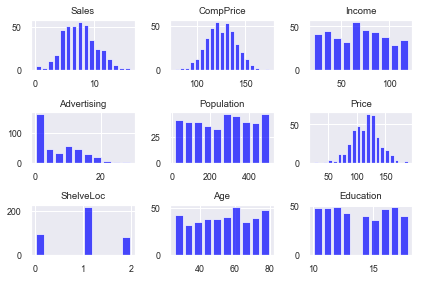

In [47]:
plt.figure(figsize = [30,30])
f, a = plt.subplots(3,3)
a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(df.iloc[:,idx], bins='auto', color = 'blue', alpha = 0.7, rwidth = 0.8)
    ax.set_title(df.columns[idx])
plt.tight_layout()

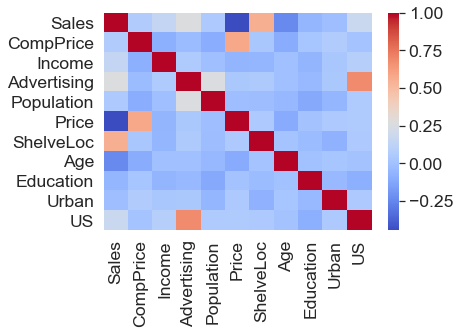

In [48]:
sns.set(font_scale = 1.6)
corrMatrix = sns.heatmap(df.corr(), annot = False, cmap = "coolwarm")

Убеждаемся в том, что большинство признаков слабо коррелируют друг с другом.

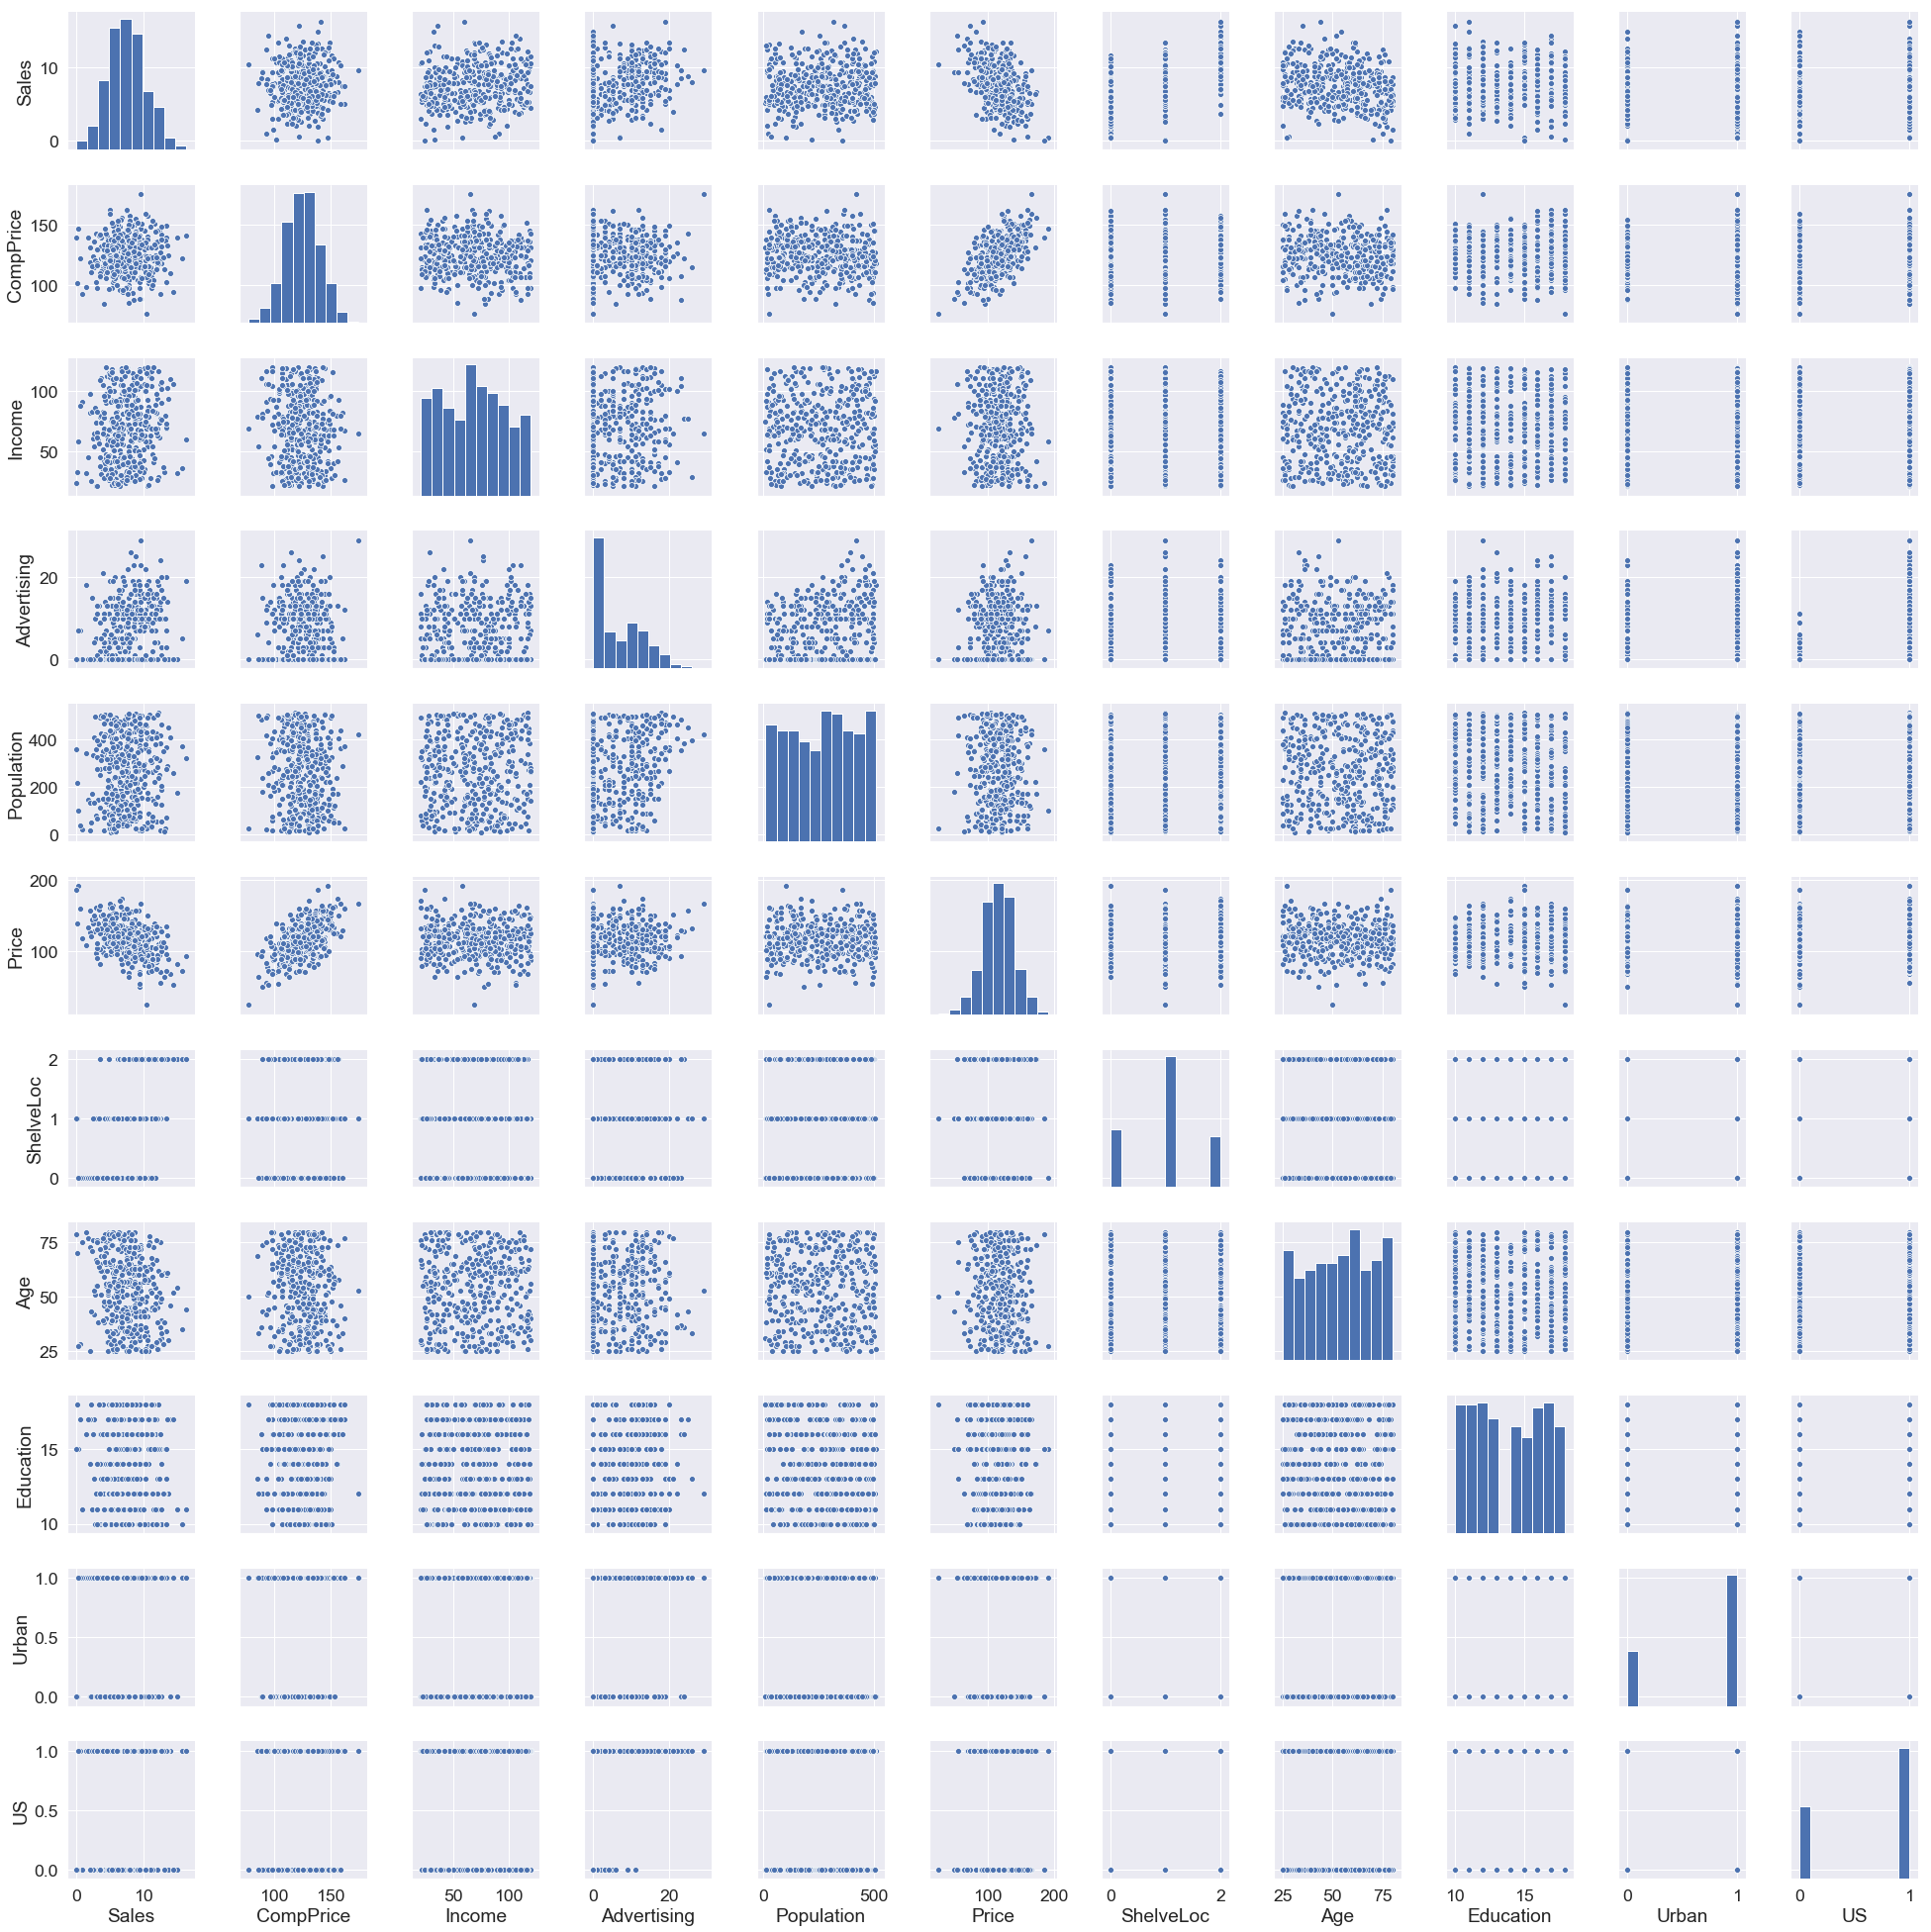

In [66]:
sns.pairplot(df)

Отдельно построим облака рассеяния для объясняемой переменной по всем оставшимся переменным.

In [56]:
li = list(df.columns[1:])

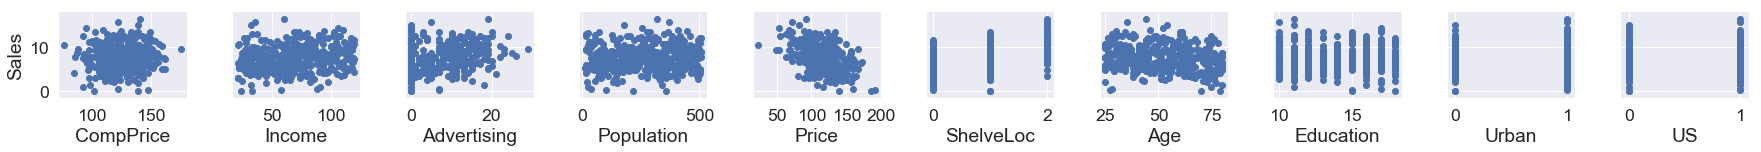

In [69]:
g = sns.PairGrid(df, y_vars = ["Sales"], x_vars = li)
g = g.map(plt.scatter)

И корреляцию по столбцу ***"Sales"*** нашего массива данных (отсортированы в порядке убывания модуля):

In [86]:
df.corr()['Sales'].abs().sort_values(ascending=False)

Sales          1.000000
ShelveLoc      0.554458
Price          0.444951
Advertising    0.269507
Age            0.231815
US             0.177093
Income         0.151951
CompPrice      0.064079
Education      0.051955
Population     0.050471
Urban          0.015419
Name: Sales, dtype: float64

Видим, что наибольшее влияние на изменения в кол-ве продаж автомобильных кресел оказывают изменения в качестве расположения стеллажей для автокресел **ShelveLoc**, цене продажи кресел **Price**. Чуть меньшее влияние оказывают изменения в размере вложений в рекламу **Advertising**, среднем возрасте населения **Age**.
<br>
Причем зависимость от значений переменной **Price** близка к линейной, судя по форме облака рассеяния.


## Линейная регрессия

Сначала построим модель парной линейной регрессии (экзогенная переменная - Price):

Свободный член:  13.770325642864208
Коэффициент:  -0.05503979315794923


Text(0, 0.5, 'Sales')

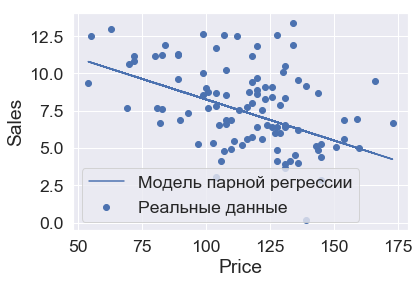

In [120]:
x_price = df.iloc[:, 5].values.reshape(-1, 1) # массив значений эндогенной переменной
y = df.iloc[:, 0].values.reshape(-1, 1) # массив значений эндогенной Price
# делим набор данных на обучающую (75%) и тестовую (25%) выборку
x_price_train, x_price_test, y_price_train, y_price_test = train_test_split(x_price, 
                                                                            y, test_size = 0.25, random_state = 0)
linregModel = LinearRegression()
linregModel.fit(x_price_train, y_price_train)
print('Свободный член: ',linregModel.intercept_[0])
print('Коэффициент: ', linregModel.coef_[0][0])
y_price_pred = linregModel.predict(x_price_test)
plt.scatter(x_price_test, y_price_test, label = "Реальные данные")
plt.plot(x_price_test, y_price_pred, label = "Модель парной регрессии")    
plt.legend()
plt.xlabel("Price")
plt.ylabel("Sales")

### Оценки модели парной регрессии

In [130]:
print('Значение R^2:', linregModel.score(x_price_test, y_price_test))
print('Значение MAE:', mr.mean_absolute_error(y_price_test, y_price_pred))
print('Значение MSE:', mr.mean_squared_error(y_price_test, y_price_pred))
print('Значение RMSE', np.sqrt(mr.mean_squared_error(y_price_test, y_price_pred)))

Значение R^2: 0.15016459850681152
Значение MAE: 2.006888586217218
Значение MSE: 6.2050910305459475
Значение RMSE 2.491002013356462


Затем будем постепенно добавлять переменные в нашу линейную модель и отбирать лучшие на основании значений ошибок:

In [149]:
#intercepts = []
#coefs = []
R_squares = []
MAEs = []
MSEs = []
RMSEs = []
predictions = []
test_y = []
for i in range(2, 11):
    x = df.iloc[:, 1:i].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    R_squares.append(lr.score(x_test, y_test))
    MAEs.append(mr.mean_absolute_error(y_test, y_pred))
    MSEs.append(mr.mean_squared_error(y_test, y_pred))
    RMSEs.append(np.sqrt(mr.mean_squared_error(y_test, y_pred)))
    predictions.append(y_pred)
    test_y.append(y_test)

optimal_R_squared = max(R_squares)
print('Максимальный R^2 по линейной модели:', optimal_R_squared)
Rsq_ind = R_squares.index(optimal_R_squared)
y_Rsq = test_y[Rsq_ind]
y_Rsq_pred = predictions[Rsq_ind]
print('Значимые показатели:', list(df.columns[1:Rsq_ind+2]),'\n')

optimal_MAE = min(MAEs)
print('Минимальная MAE по линейной модели:', optimal_MAE)
MAE_ind = MAEs.index(optimal_MAE)
y_MAE = test_y[MAE_ind]
y_MAE_pred = predictions[MAE_ind]
print('Значимые показатели:', list(df.columns[1:MAE_ind+2]),'\n')

optimal_MSE = min(MSEs)
print('Минимальная MSE по линейной модели:', optimal_MSE)
MSE_ind = MSEs.index(optimal_MSE)
y_MSE = test_y[MSE_ind]
y_MSE_pred = predictions[MSE_ind]
print('Значимые показатели:', list(df.columns[1:MSE_ind+2]),'\n')


optimal_RMSE = min(RMSEs)
print('Минимальная RMSE по линейной модели:', optimal_RMSE)
RMSE_ind = RMSEs.index(optimal_RMSE)
y_RMSE = test_y[RMSE_ind]
y_RMSE_pred = predictions[RMSE_ind]
print('Значимые показатели:', list(df.columns[1:RMSE_ind+2]),'\n')

Максимальный R^2 по линейной модели: 0.8329390158821467
Значимые показатели: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age'] 

Минимальная MAE по линейной модели: 0.8925147008656462
Значимые показатели: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age'] 

Минимальная MSE по линейной модели: 1.2197992838171732
Значимые показатели: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age'] 

Минимальная RMSE по линейной модели: 1.1044452380345406
Значимые показатели: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age'] 



Text(0, 0.5, 'Прогнозные данные')

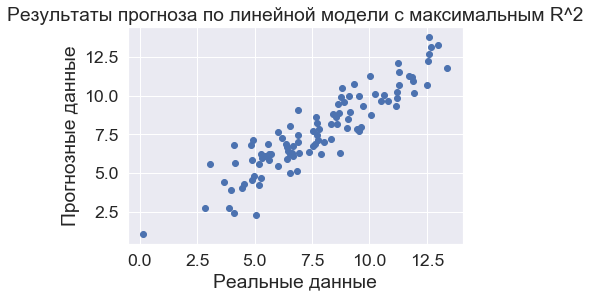

In [142]:
plt.scatter(y_Rsq, y_Rsq_pred)
plt.title('Результаты прогноза по линейной модели с максимальным R^2')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")

Text(0, 0.5, 'Прогнозные данные')

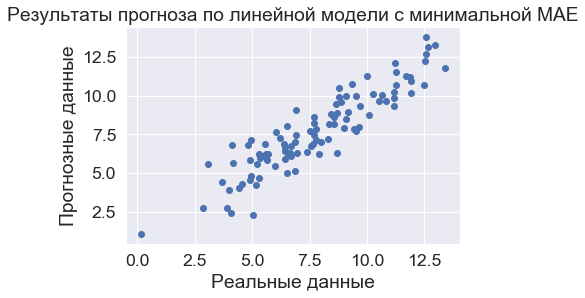

In [143]:
plt.scatter(y_MAE, y_MAE_pred)
plt.title('Результаты прогноза по линейной модели с минимальной MAE')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")

Text(0, 0.5, 'Прогнозные данные')

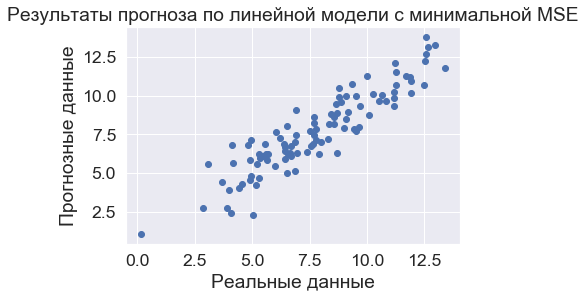

In [144]:
plt.scatter(y_MSE, y_MSE_pred)
plt.title('Результаты прогноза по линейной модели с минимальной MSE')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")

Text(0, 0.5, 'Прогнозные данные')

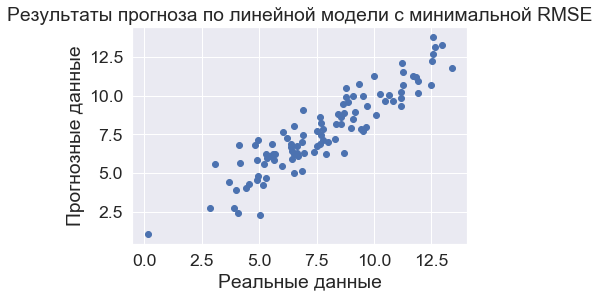

In [145]:
plt.scatter(y_RMSE, y_RMSE_pred)
plt.title('Результаты прогноза по линейной модели с минимальной RMSE')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")

Таким образом, модель линейной регрессии, использующая в качестве регрессоров такие показатели как:
<br>
**CompPrice** - цена, взимаемая конкурентом в населеном пункте
<br>
**Income** - уровень дохода (в тысячах долларов)
<br>
**Advertising** - местный рекламный бюджет для компании в населенном пункте (в тысячах долларов)
<br>
**Population** - численность населения в регионе (в тысячах человек)
<br>
**Price** - цена, которую компания взимает за автомобильное кресло в регионе
<br>
**ShelveLoc** - качество расположения стеллажей для автокресел в населенном пункте.
Имеет значения ***"Bad", "Good", "Medium"***
<br>
**Age** - средний возраст среди местного населения
<br>
на 83% объясняет кол-во продаж автомобильных кресел по тестовой выборке.

### Гребневая регрессия (Ridge Regression)

Значение R^2: 0.8198721065805766
Значение MAE: 0.9241524659699908
Значение MSE: 1.3152075964876822
Значение RMSE 1.1468250069159123


Text(0, 0.5, 'Прогнозные данные')

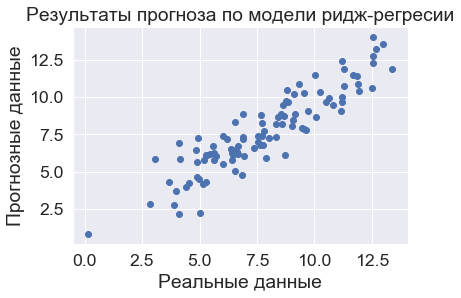

In [157]:
# параметры по умолчанию
x = df.iloc[:, 1:11].values
ri_x_train, ri_x_test, ri_y_train, ri_y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

ridge = Ridge()
ridge.fit(ri_x_train, ri_y_train)
ri_y_pred = ridge.predict(ri_x_test)

print('Значение R^2:', ridge.score(ri_x_test, ri_y_test))
print('Значение MAE:', mr.mean_absolute_error(ri_y_test, ri_y_pred))
print('Значение MSE:', mr.mean_squared_error(ri_y_test, ri_y_pred))
print('Значение RMSE', np.sqrt(mr.mean_squared_error(ri_y_test, ri_y_pred)))

plt.scatter(ri_y_test, ri_y_pred)
plt.title('Результаты прогноза по модели ридж-регресии')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")

### Лассо-регрессия (Lasso Regression)

Значение R^2: 0.5531083834749956
Значение MAE: 1.4384316124259005
Значение MSE: 3.262988522781267
Значение RMSE 1.8063744137861528


Text(0, 0.5, 'Прогнозные данные')

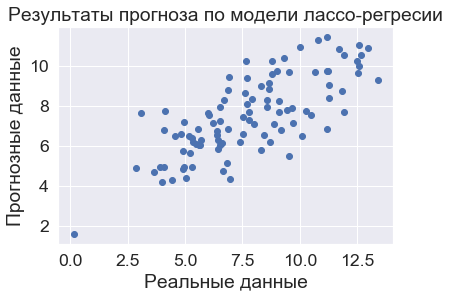

In [158]:
# параметры по умолчанию
x = df.iloc[:, 1:11].values
la_x_train, la_x_test, la_y_train, la_y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

lasso = Lasso()
lasso.fit(la_x_train, la_y_train)
la_y_pred = lasso.predict(la_x_test)

print('Значение R^2:', lasso.score(la_x_test, la_y_test))
print('Значение MAE:', mr.mean_absolute_error(la_y_test, la_y_pred))
print('Значение MSE:', mr.mean_squared_error(la_y_test, la_y_pred))
print('Значение RMSE', np.sqrt(mr.mean_squared_error(la_y_test, la_y_pred)))

plt.scatter(la_y_test, la_y_pred)
plt.title('Результаты прогноза по модели лассо-регресии')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")

### Ядерная регрессия (Kernel Regression)

Значение R^2: 0.8071748751225468
Значение MAE: 0.9847637008911231
Значение MSE: 1.4079166986203469
Значение RMSE 1.186556656304429


Text(0, 0.5, 'Прогнозные данные')

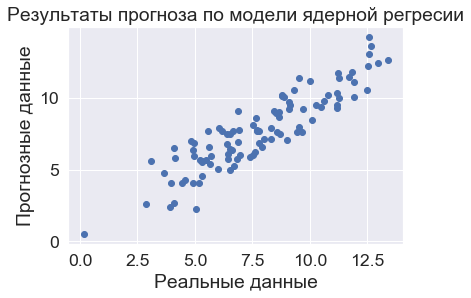

In [162]:
# параметры по умолчанию
x = df.iloc[:, 1:11].values
ke_x_train, ke_x_test, ke_y_train, ke_y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

kern = KernelRidge()
kern.fit(ke_x_train, ke_y_train)
ke_y_pred = kern.predict(ke_x_test)

print('Значение R^2:', kern.score(ke_x_test, ke_y_test))
print('Значение MAE:', mr.mean_absolute_error(ke_y_test, ke_y_pred))
print('Значение MSE:', mr.mean_squared_error(ke_y_test, ke_y_pred))
print('Значение RMSE', np.sqrt(mr.mean_squared_error(ke_y_test, ke_y_pred)))

plt.scatter(ke_y_test, ke_y_pred)
plt.title('Результаты прогноза по модели ядерной регресии')
plt.xlabel("Реальные данные")
plt.ylabel("Прогнозные данные")